In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


#### **Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?**

In [36]:
c = cast[cast.character.isin(['Superman','Batman'])][['year','character']]
c = c.groupby(['year','character']).size().unstack().fillna(0)
SupermanYear = c[c.Superman > c.Batman]
print('Superman years:')
print(len(SupermanYear),'years')
SupermanYear.head()

Superman years:
12 years


character,Batman,Superman
year,,
1948,0.0,1.0
1950,0.0,1.0
1951,0.0,2.0
1954,0.0,5.0
1955,0.0,1.0


#### **How many years have been "Batman years", with more Batman characters than Superman characters?**

In [37]:
c = cast[cast.character.isin(['Superman','Batman'])][['year','character']]
c = c.groupby(['year','character']).size().unstack().fillna(0)
BatmanYear = c[c.Superman < c.Batman]
print('Batman years:')
print(len(BatmanYear),'years')
BatmanYear.head()

Batman years:
24 years


character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1949,2.0,0.0
1953,2.0,0.0


#### **Plot the number of actor roles each year and the number of actress roles each year over the history of film.**

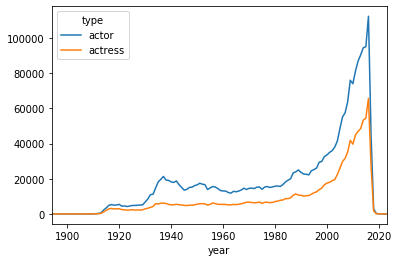

In [44]:
cast.groupby(['year','type']).size().unstack().fillna(0).plot(subplots = False)

#### **Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.**

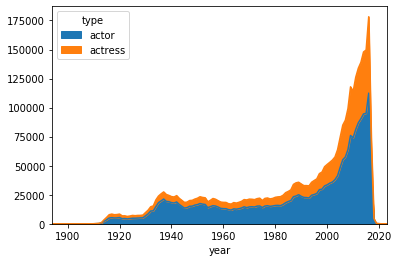

In [45]:
cast.groupby(['year','type']).size().unstack().fillna(0).plot(kind='area')

#### **Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.**

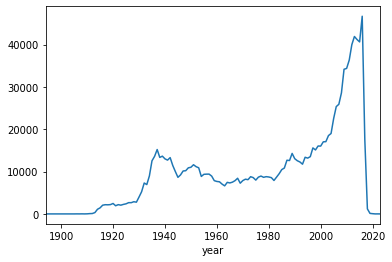

In [61]:
c = cast.groupby(['year','type']).size().unstack('type').fillna(0)
c.actor.subtract(c.actress).sort_index().plot()

#### **Plot the fraction of roles that have been 'actor' roles each year in the history of film.**

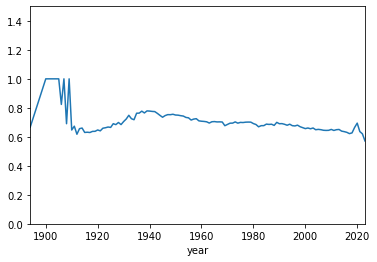

In [115]:
c = cast.groupby(['year','type']).size().unstack('type').fillna(0)
c.actor.divide(c.actor.add(c.actress)).sort_index().plot(ylim=[0,1.5])

#### **Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.**

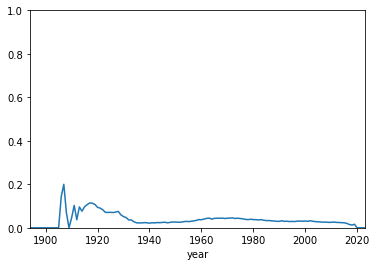

In [128]:
c = cast[cast.type == 'actor']
c = c.groupby([c.year,c.n == 2]).size().unstack('n').fillna(0)
c[True].divide(c[False] + c[True]).plot(ylim=[0,1])

#### **Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.**

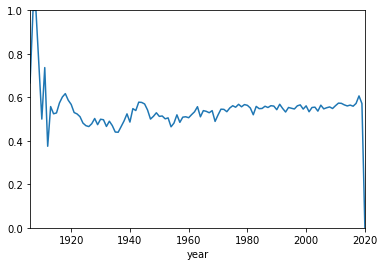

In [133]:
c = cast[cast.n == 2].groupby(['year','type']).size().unstack('type').fillna(0)
c.actor.divide(c.actor.add(c.actress)).sort_index().plot(ylim=[0,1])

#### **Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film**

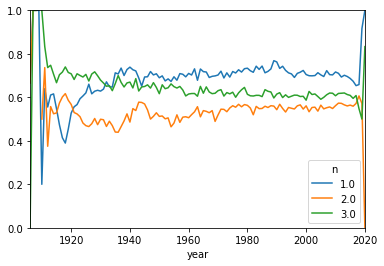

In [162]:
c = cast[cast.n <= 3].groupby(['year','type','n']).size().unstack('type').fillna(0)
c.actor.divide(c.actor.add(c.actress)).unstack('n').plot(ylim = (0,1))